In [1]:
##### _+_+#__#+_#+_+_+_####################### REPORT GENERATION CODE ##############################
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
from reportlab.platypus import BaseDocTemplate, PageTemplate, Frame, Paragraph, Table, TableStyle, Spacer,PageBreak, KeepInFrame, Image
from reportlab.pdfgen import canvas
from reportlab.lib import colors
from reportlab.platypus import Table, TableStyle
from reportlab.lib.units import inch

from os import listdir, walk
from os.path import isfile, join
import pandas as pd
from pandas import ExcelWriter
import numpy as np
from openpyxl import load_workbook
from openpyxl import Workbook
from openpyxl import cell
from openpyxl.utils import get_column_letter


import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, Image
from matplotlib import ticker
import os
from enum import Enum
from dataclasses import dataclass

In [5]:
@dataclass
class RoomProperties:
    Source_Room: str
    Recieve_Room: str
    Testdate: str
    ReportDate: str
    Project_Name: str
    Test_number: str
    Source_Vol: str
    Recieve_Vol: str
    Partition_area: str
    Partition_dim: str
    Source_room_Finish: str
    Recieve_room_Finish: str
    Srs_Floor_Descrip: str
    Srs_Ceiling_Descrip: str
    Srs_Walls_Descrip: str
    Rec_Floor_Descrip: str
    Rec_Ceiling_Descrip: str
    Rec_Walls_Descrip: str
    Tested_Assembly: str
    Expected_Performance: str
    Annex_2_used: str
    Test_assem_type: str
    NIC_reporting_Note: str
    test_assembly_type: str

@dataclass
class TestData:
    single_AIICtest_data: pd.DataFrame
    single_AIICtest_data: pd.DataFrame
    single_ASTCtest_data: pd.DataFrame
    single_DTCtest_data: pd.DataFrame
    room_properties: pd.DataFrame

@dataclass
class TestType(Enum):
    AIIC = "AIIC"
    ASTC = "ASTC"
    NIC = "NIC"
    DTC = "DTC"

@dataclass
class ReportData:
    room_properties: pd.DataFrame
    test_data: TestData
    test_type: TestType


In [ ]:
from config import *

In [1]:
print(curr_test)

NameError: name 'curr_test' is not defined

/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/A_Meter/831_0002237-20240404 144640-831_Data.029.xlsx
/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/831_0004328-20240404 144622-831_Data.264.xlsx
/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/831_0004328-20240404 144406-831_Data.263.xlsx
/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/831_0004328-20240404 160422-RT_Data.140.xlsx
/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/831_0004328-20240404 144958-831_Data.265.xlsx
/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/831_0004328-20240404 145232-831_Data.266.xlsx
/Users/jakepfitsch/Docu

/var/folders/f9/w83vlt_n1pzfg4mfd2prrgq00000gn/T/ipykernel_58795/3364229196.py:203: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recieve_corr.append(rec_overalloct[i])
/var/folders/f9/w83vlt_n1pzfg4mfd2prrgq00000gn/T/ipykernel_58795/3364229196.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  recieve_corr.append(10*np.log10((10**(rec_overalloct[i]/10))-(10**(bkgrnd_overalloct[i]/10))))
/var/folders/f9/w83vlt_n1pzfg4mfd2prrgq00000gn/T/ipykernel_58795/3364229196.py:195: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (co

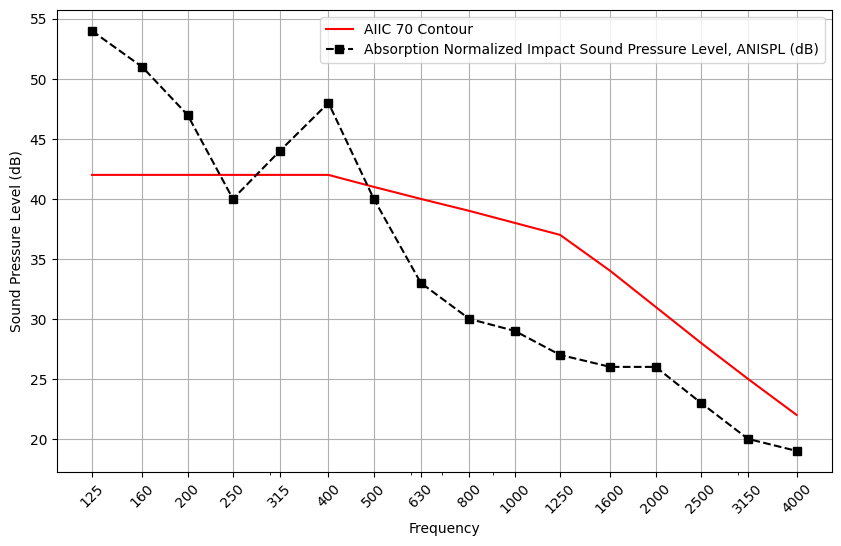

<Figure size 640x480 with 0 Axes>

In [6]:
## function section #####
def format_SLMdata(srs_data):
    srs_thirdoct = srs_data.iloc[7] # hardcoded to SLM export data format
    srs_thirdoct = srs_thirdoct[13:31] # select only the frequency bands of interest
    return srs_thirdoct

def calculate_onethird_Logavg(average_pos):
    if isinstance(average_pos, pd.DataFrame):
        average_pos = average_pos.values
    onethird_rec_Total = []
    for i in range(len(average_pos)):
        freqbin = average_pos[i]
        total = 0
        count = 0
        for val in freqbin:
            if not pd.isnull(val):
                total += 10**(val/10)
                count += 1
        if count > 0:
            average = total / count
            onethird_rec_Total.append(10 * np.log10(average))
        else:
            onethird_rec_Total.append(np.nan)
    onethird_rec_Total = np.round(onethird_rec_Total, 1)
    return onethird_rec_Total
# need to modify for testing without GUI
def RAW_SLM_datapull(find_datafile, datatype):
    # pass datatype as '-831_Data.' or '-RT_Data.' to pull the correct data
    raw_testpaths = {
        'A': Aslmdatapath,
        'E': Eslmdatapath,
        # 'A': self.slm_data_a_path
    }
    datafiles = {}
    for key, path in raw_testpaths.items():
        datafiles[key] = [f for f in listdir(path) if isfile(join(path, f))]

    if find_datafile[0] in datafiles:
        # print('data found')
        # print(datafiles[find_datafile[0]])
        datafile_num = datatype + find_datafile[1:] + '.xlsx'
        # print(datafile_num)
        slm_found = [x for x in datafiles[find_datafile[0]] if datafile_num in x]
        slm_found[0] = raw_testpaths[find_datafile[0]] + slm_found[0]  # If this line errors, the test file is mislabeled or doesn't exist 

    print(slm_found[0])
    if datatype == '-831_Data.':
        srs_data = pd.read_excel(slm_found[0], sheet_name='OBA')
    elif datatype == '-RT_Data.':
        srs_data = pd.read_excel(slm_found[0], sheet_name='Summary')  # data must be in Summary tab for RT meas.
    return srs_data
def calc_NR_new(srs_overalloct, AIIC_rec_overalloct, ASTC_rec_overalloct, bkgrnd_overalloct, sabines, recieve_roomvol, NIC_vollimit):
    NIC_vollimit = 150  # cu. ft.
    NIC_start = 16
    STCCurve = [-16, -13, -10, -7, -4, -1, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4]
    if recieve_roomvol > NIC_vollimit:
        print('Using NIC calc, room volume too large')
    # sabines = 0.049*(recieve_roomvol/rt_thirty)  # this produces accurate sabines values
    # recieve_corr = list()
    ASTC_recieve_corr = list()
    AIIC_recieve_corr = list()

    AIIC_rec_overalloct = pd.to_numeric(AIIC_rec_overalloct)
    ASTC_rec_overalloct = pd.to_numeric(ASTC_rec_overalloct)
    bkgrnd_overalloct = pd.to_numeric(bkgrnd_overalloct)

    AIIC_recieve_vsBkgrnd = AIIC_rec_overalloct - bkgrnd_overalloct
    ASTC_recieve_vsBkgrnd = ASTC_rec_overalloct - bkgrnd_overalloct
    # print('AIIC recieve: ',AIIC_rec_overalloct)
    # print('STC Recieve: ', ASTC_rec_overalloct)
    # print('background: ',bkgrnd_overalloct)
    AIIC_recieve_vsBkgrnd = np.round(AIIC_recieve_vsBkgrnd,1)

    ASTC_recieve_vsBkgrnd = np.round(ASTC_recieve_vsBkgrnd,1)
    # print('ASTC recieve vs background:',ASTC_recieve_vsBkgrnd)

    for i, val in enumerate(AIIC_recieve_vsBkgrnd):
        if val < 5:
            AIIC_recieve_corr.append(AIIC_rec_overalloct[i]-2)
        else:
            input_aiic = 10**(AIIC_rec_overalloct[i]/10)
            background = 10**(bkgrnd_overalloct[i]/10)
            input_vs_bkgrnd = input_aiic - background
            if input_vs_bkgrnd < 0:
                input_vs_bkgrnd = input_vs_bkgrnd * -1
            AIIC_recieve_corr.append(10*np.log10(input_vs_bkgrnd))
    print('-=-=-=--==-=-=-=-=- Moving to ASTC calc=-=-=-=--=-=-=-=-=-=-=-')   
    for i, val in enumerate(ASTC_recieve_vsBkgrnd):
        if val < 5:
            ASTC_recieve_corr.append(ASTC_rec_overalloct[i]-2)
        elif val < 10:
            print('val: ', val)
            input_astc = 10**(ASTC_rec_overalloct[i]/10)
            background = 10**(bkgrnd_overalloct[i]/10)
            input_vs_bkgrnd = input_astc - background
            if input_vs_bkgrnd < 0:
                input_vs_bkgrnd = input_vs_bkgrnd * -1
            ASTC_recieve_corr.append(10*np.log10(input_vs_bkgrnd))
        else:
            ASTC_recieve_corr.append(ASTC_rec_overalloct[i])
    print('ASTC recieve: ', ASTC_recieve_corr)
        # print('-=-=-=-=-')
        # print('recieve_corr: ',recieve_corr)
    AIIC_recieve_corr = np.round(AIIC_recieve_corr,1)
    ASTC_recieve_corr = np.round(ASTC_recieve_corr,1)
    # print('corrected recieve ISPL: ', AIIC_recieve_corr)
    print('corrected recieve ASTC: ', ASTC_recieve_corr)
    print('srs overall: ', srs_overalloct)
    NR_val = srs_overalloct - ASTC_recieve_corr
    NR_val = pd.to_numeric(NR_val, errors='coerce')
    print('NR_val: ', NR_val)
    ##### Writing in the NIC curve calculation #####
    ### THIS IS NOT WORKING _ TROUBLSHOOTING 10-7-24 ###
    diff_negative = 0
    new_sum = 0
    pos_diffs = list()
    New_curve = list()
    NIC_val_list = NR_val[1:17]
    print('NIC initial val list: ', NIC_val_list)
    while (diff_negative <= 8 and new_sum <= 32):
        for vals in STCCurve:
            New_curve.append(vals+NIC_start)
        NIC_curve = New_curve - NIC_val_list
        NIC_curve = np.round(NIC_curve)
        diff_negative = np.max(NIC_curve)
        print('NIC curve: ',NIC_curve)
        for val in NIC_curve:
            if val > 0:
                pos_diffs.append(np.round(val))
            else:
                pos_diffs.append(0)
        new_sum = np.sum(pos_diffs)
        if new_sum > 32 or diff_negative > 8:
            print('Curve fit too high! NIC fit: ', NIC_start-1)
            NIC_final_val = NIC_start-1
            # return NIC_final_val
            break
        pos_diffs = []
        New_curve = []
        print('NIC curve: ',NIC_curve)
        NIC_start = NIC_start + 1
        if NIC_start >80: break
    # Normalized_recieve = recieve_corr / srs_overalloct
    sabines = pd.to_numeric(sabines, errors='coerce')
    sabines = np.round(sabines)
    if isinstance(sabines, pd.DataFrame):
        sabines = sabines.values

    AIIC_Normalized_recieve = list()
    AIIC_Normalized_recieve = AIIC_recieve_corr-10*(np.log10(108/sabines))
    AIIC_Normalized_recieve = np.round(AIIC_Normalized_recieve)

    print('Normalized_recieve: ',AIIC_Normalized_recieve)
    return NR_val, NIC_final_val, sabines,AIIC_recieve_corr, ASTC_recieve_corr, AIIC_Normalized_recieve

def calc_ATL_val(srs_overalloct,rec_overalloct,bkgrnd_overalloct,rt_thirty,parition_area,recieve_roomvol):
    ASTC_vollimit = 883
    if recieve_roomvol > ASTC_vollimit:
        print('Using NIC calc, room volume too large')
    # constant = np.int32(20.047*np.sqrt(273.15+20))
    # intermed = 30/rt_thirty ## why did i do this? not right....sabines calc is off
    # thisval = np.int32(recieve_roomvol*intermed)
    # sabines =thisval/constant

    # RT value is right, why is this not working?
    # print('recieve roomvol: ',recieve_roomvol)
    if isinstance(rt_thirty, pd.DataFrame):
        rt_thirty = rt_thirty.values
    print('rt_thirty: ',rt_thirty)
    
    sabines = 0.049*recieve_roomvol/rt_thirty  # this produces accurate sabines values

    if isinstance(bkgrnd_overalloct, pd.DataFrame):
        bkgrnd_overalloct = bkgrnd_overalloct.values
    # print('bkgrnd_overalloct: ',bkgrnd_overalloct)
    # sabines = np.int32(sabines) ## something not right with this calc
    sabines = np.round(sabines)
    print('sabines: ',sabines)
    
    recieve_corr = list()
    # print('recieve: ',rec_overalloct)
    recieve_vsBkgrnd = rec_overalloct - bkgrnd_overalloct

    if isinstance(recieve_vsBkgrnd, pd.DataFrame):
        recieve_vsBkgrnd = recieve_vsBkgrnd.values

    if isinstance(rec_overalloct, pd.DataFrame):
        rec_overalloct = rec_overalloct.values
    # print('recieve vs  background: ',recieve_vsBkgrnd)
    # print('recieve roomvol: ',recieve_roomvol)
    #### something wrong with this loop #### 
    for i, val in enumerate(recieve_vsBkgrnd):
        if val < 5:
            # print('recieve vs background: ',val)
            recieve_corr.append(rec_overalloct[i]-2)
            # print('less than 5, appending: ',recieve_corr[i])
        elif val < 10:
            # print('recieve vs background: ',val)
            recieve_corr.append(10*np.log10((10**(rec_overalloct[i]/10))-(10**(bkgrnd_overalloct[i]/10))))
            # print('less than 10, appending: ',recieve_corr[i])
        else:
            # print('recieve vs background: ',val)
            recieve_corr.append(rec_overalloct[i])
            # print('greater than 10, appending: ',recieve_corr[i])
            
    
    # print('recieve correction: ',recieve_corr)
    if isinstance(srs_overalloct, pd.DataFrame):
        recieve_corr = recieve_corr.values
    if isinstance(srs_overalloct, pd.DataFrame):
        srs_overalloct = srs_overalloct.values
    if isinstance(sabines, pd.DataFrame):
        sabines = sabines.values
    # print('srs overalloct: ',srs_overalloct)
    # print('recieve correction: ',recieve_corr)
    # print('sabines: ',sabines)
    ATL_val = []
    for i, val in enumerate(srs_overalloct):
        ATL_val.append(srs_overalloct[i]-recieve_corr[i]+10*(np.log10(parition_area/sabines.iloc[i])))
    # ATL_val = srs_overalloct - recieve_corr+10*(np.log(parition_area/sabines)) 
    ATL_val = np.round(ATL_val,1)
    # print('ATL val: ',ATL_val)
    return ATL_val, sabines
def create_tables(data, col_width=None, row_heights=None, style=None):
    table = Table(data, colWidths=col_width, rowHeights=row_heights)

    if style is None:
        style = TableStyle([
            ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
            ('FONTSIZE', (0, 0), (-1, 0), 14),
            ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
            ('TEXTWRAP', (0, 1), (-1, -1)),
            ('TEXTCOLOR', (0, 1), (-1, -1), colors.black),
            ('ALIGN', (0, 1), (-1, -1), 'LEFT'),
            ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),
            ('FONTSIZE', (0, 1), (-1, -1), 12),
            ('BOTTOMPADDING', (0, 1), (-1, -1), 12),
            ('TOPPADDING', (0, 1), (-1, -1), 12),
            ('GRID', (0, 0), (-1, -1), 1, colors.black),
        ])
    table.setStyle(style)
    return table

def calc_AIIC_val_claude(Normalized_recieve_IIC, verbose=True):
    pos_diffs = list()
    diff_negative_min = 0
    AIIC_start = 94
    AIIC_contour_val = 16
    IIC_contour = list()
    AIIC_curve = list()
    new_sum = 0
    diff_negative_max = 0
    IIC_curve = [2,2,2,2,2,2,1,0,-1,-2,-3,-6,-9,-12,-15,-18]
    max_iterations = 100  # Maximum number of iterations to prevent infinite loop
    iteration_count = 0
    # initial application of the IIC curve to the first AIIC start value 
    for vals in IIC_curve:
        IIC_contour.append(vals+AIIC_start)
    Normalized_recieve_IIC = pd.to_numeric(Normalized_recieve_IIC, errors='coerce')
    Normalized_recieve_IIC = np.array(Normalized_recieve_IIC)
    Normalized_recieve_IIC = np.round(Normalized_recieve_IIC,1)
    Normalized_recieve_IIC = Normalized_recieve_IIC[1:17]
    print('Normalized recieve ANISPL: ', Normalized_recieve_IIC)
    # Contour_curve_result = IIC_contour - Normalized_recieve_IIC
    Contour_curve_result =  Normalized_recieve_IIC - IIC_contour
    Contour_curve_result = np.round(Contour_curve_result,1)
    
    # print('Contour curve: ', Contour_curve_result)
    while (diff_negative_max < 8 and new_sum < 32 and iteration_count < max_iterations):
        if verbose:
            print(f"Iteration {iteration_count}:")
            print(f"  AIIC_contour_val: {AIIC_contour_val}")
            print(f"  diff_negative_max: {diff_negative_max}")
            print(f"  new_sum: {new_sum}")
        print('Inside loop, current AIIC contour: ', AIIC_contour_val)
        # print('Contour curve (IIC curve minus ANISPL): ', Contour_curve_result)
        
        diff_negative = Normalized_recieve_IIC - IIC_contour
        # print('diff negative: ', diff_negative)
        diff_negative_max = np.max(diff_negative)
        diff_negative = pd.to_numeric(diff_negative, errors='coerce')
        diff_negative = np.array(diff_negative)
        # print('Max, single diff: ', diff_negative_max)
        pos_diffs = [np.round(val,1) if val > 0 else 0 for val in diff_negative]
        # print('positive diffs: ', pos_diffs)
        new_sum = np.sum(pos_diffs)
        # ipdb.set_trace()   ### debugging 
        
        # print('Sum Positive diffs: ', new_sum)
        # print('Evaluating sums and differences vs 32, 8: ', new_sum, diff_negative_max)
        
        if new_sum > 32 or diff_negative_max > 8:
            print('Difference condition met! AIIC value: ', AIIC_contour_val)
            print('AIIC result curve: ', Contour_curve_result)
            return AIIC_contour_val, Contour_curve_result
        else:
            print('difference condition not met, subtracting 1 from AIIC start and recalculating the IIC contour')
            AIIC_start -= 1
            print('new AIIC start: ', AIIC_start)
            AIIC_contour_val += 1
            print('AIIC contour value: ', AIIC_contour_val)
            IIC_contour = [vals + AIIC_start for vals in IIC_curve]
            print('IIC contour: ', IIC_contour)
            
            Contour_curve_result =  Normalized_recieve_IIC - IIC_contour
            print('Contour curve result: ', Contour_curve_result)
            
            iteration_count += 1

    if iteration_count == max_iterations:
        print(f"Maximum iterations ({max_iterations}) reached without meeting conditions.")
    else:
        print("Loop completed without meeting conditions. Returning last calculated values.")
    print(f"Loop exited. Final values:")
    print(f"  diff_negative_max: {diff_negative_max}")
    print(f"  new_sum: {new_sum}")
    print(f"  iterations: {iteration_count}")
    print('Contour curve (IIC curve minus ANISPL): ', Contour_curve_result)
    print('IIC contour value: ', AIIC_contour_val)


    return AIIC_contour_val, Contour_curve_result

def plot_curves(frequencies, Y_label, Ref_curve, Field_curve, Ref_label, Field_label):
    # Check lengths of the arrays
    print(f"Length of frequencies: {len(frequencies)}")
    print(f"Length of Ref_curve: {len(Ref_curve)}")
    print(f"Length of Field_curve: {len(Field_curve)}")
    
    # Ensure all arrays have the same length
    min_length = min(len(frequencies), len(Ref_curve), len(Field_curve))
    frequencies = frequencies[:min_length]
    Ref_curve = Ref_curve[:min_length]
    Field_curve = Field_curve[:min_length]
    
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, Ref_curve, label=Ref_label, color='red')
    plt.plot(frequencies, Field_curve, label=Field_label, color='black', marker='s', linestyle='--')
    plt.xlabel('Frequency')
    plt.ylabel(Y_label)
    plt.grid(True)
    plt.tick_params(axis='x', rotation=45)
    plt.xticks(frequencies)
    plt.xscale('log')
    plt.gca().get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Format x-ticks as scalars
    plt.gca().xaxis.set_major_locator(ticker.FixedLocator(frequencies))  # Force all x-ticks to display
    # plt.title('Reference vs Measured')
    plt.legend()
    # plt.show()
    fig = plt.figure()
    fig.savefig('plot.png')
    plot_fig = Image('plot.png')
    return plot_fig
### constants section #####

# overall project variable definitions - 
#### moving all of the SLM auto importer over as the front-end, so i can just run this one piece and then move through debugging the create_report function itself. 
project_number = '24-104'
testplan_path ='/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/TestPlan_ASTM_testingv1.xlsx'
Aslmdatapath = '/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/A_Meter/'
Eslmdatapath = '/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata/RawData/E_Meter/'
testplanfile = pd.read_excel(testplan_path)
testnums = testplanfile['Test_Label'] ## Determines the labels and number of excel files copied
curr_test = testplanfile.iloc[0]
# print(curr_test)    
## need to add site name ane client name in here

room_properties = pd.DataFrame(
    {
        "Source Room Name": curr_test['Source_Room'],
        "Recieve Room Name": curr_test['Receiving_Room'],
        "Testdate": curr_test['Test_Date'],
        "ReportDate": curr_test['Report_Date'],
        "Project Name": curr_test['Project_Name'],
        # "Site_Name": curr_test['Site_Name'], ### ADD THIS IN
        # "Client_Name": curr_test['Client_Name'],  ### ADD THIS IN
        "Test number": curr_test['Test_Label'],
        "Source Vol" : curr_test['source_room_vol'],
        "Recieve Vol": curr_test['receive_room_vol'],
        "Partition area": curr_test['partition_area'],
        "Partition dim.": curr_test['partition_dim'],
        "Source room Finish" : curr_test['source_room_finish'],
        "Recieve room Finish": curr_test['receive_room_finish'],
        "Srs Floor Descrip.": curr_test['srs_floor'],
        "Srs Ceiling Descrip.": curr_test['srs_ceiling'],
        "Srs Walls Descrip.": curr_test['srs_Walls'],
        "Rec Floor Descrip.": curr_test['rec_floor'],
        "Rec Ceiling Descrip.": curr_test['rec_ceiling'],
        "Rec Walls Descrip.": curr_test['rec_Wall'],          
        "Tested Assembly": curr_test['tested_assembly'],
        "Expected Performance": curr_test['expected_performance'],
        "Annex 2 used?": curr_test['Annex_2_used?'],
        "Test assem. type": curr_test['Test_assembly_Type'],
        "AIIC": curr_test['AIIC_test'],
        "NIC": curr_test['NIC_test'],
        "ASTC": curr_test['ASTC_test']
        # "NIC reporting Note": NICreporting_Note
    },
    index=[0]
    )
# single_test_dataframe = pull_testplan_data(curr_test) 
## these are file numbers in the xexcel fname
find_source = curr_test['Source']
find_rec = curr_test['Recieve '] #trailing whitespace? be sure to verify this is consistent in the excel file
find_BNL = curr_test['BNL']
find_RT = curr_test['RT']
find_posOne = curr_test['Position1']
find_posTwo = curr_test['Position2']
find_posThree = curr_test['Position3']
find_posFour = curr_test['Position4']
find_poscarpet = curr_test['Carpet']
find_Tapsrs = curr_test['SourceTap']

# these are pulling the dataframes from the excel path 
source_data = RAW_SLM_datapull(find_source,'-831_Data.')
recive_data = RAW_SLM_datapull(find_rec,'-831_Data.')
bkgrnd_data = RAW_SLM_datapull(find_BNL,'-831_Data.')
rt = RAW_SLM_datapull(find_RT,'-RT_Data.')
AIIC_pos1 = RAW_SLM_datapull(find_posOne,'-831_Data.')
AIIC_pos2 = RAW_SLM_datapull(find_posTwo,'-831_Data.')
AIIC_pos3 = RAW_SLM_datapull(find_posThree,'-831_Data.')
AIIC_pos4 = RAW_SLM_datapull(find_posFour,'-831_Data.')
AIIC_carpet = RAW_SLM_datapull(find_poscarpet,'-831_Data.')
AIIC_source = RAW_SLM_datapull(find_Tapsrs,'-831_Data.')

single_AIICtest_data = {
    'srs_data': pd.DataFrame(source_data),
    'recive_data': pd.DataFrame(recive_data),
    'bkgrnd_data': pd.DataFrame(bkgrnd_data),
    'rt': pd.DataFrame(rt),
    'AIIC_pos1': pd.DataFrame(AIIC_pos1),
    'AIIC_pos2': pd.DataFrame(AIIC_pos2),
    'AIIC_pos3': pd.DataFrame(AIIC_pos3),
    'AIIC_pos4': pd.DataFrame(AIIC_pos4),
    'AIIC_source': pd.DataFrame(AIIC_source),
    'AIIC_carpet': pd.DataFrame(AIIC_carpet),
    'room_properties': pd.DataFrame(room_properties)
}
        # return single_AIICtest_data


### pulling SLM data from databases ####

rt_thirty = single_AIICtest_data['rt']['Unnamed: 10'][24:42]/1000
if isinstance(rt_thirty, pd.DataFrame):
    rt_thirty = rt_thirty.values
rt_thirty = pd.to_numeric(rt_thirty, errors='coerce')
rt_thirty = np.round(rt_thirty,3)
# print('rt_thirty: ',rt_thirty)
# need to pass testtype to differentiate between AIIC and ASTC calculations
testtype = 'AIIC'
onethird_srs_tapper = format_SLMdata(single_AIICtest_data['AIIC_source']) 
onethird_srs = format_SLMdata(single_AIICtest_data['srs_data'])
onethird_rec = format_SLMdata(single_AIICtest_data['recive_data'])
onethird_bkgrd = format_SLMdata(single_AIICtest_data['bkgrnd_data'])
average_pos = []
for i in range(1, 5):
    pos_input = f'AIIC_pos{i}'
    pos_data = format_SLMdata(single_AIICtest_data[pos_input])
    average_pos.append(pos_data)

average_pos = pd.concat(average_pos, axis=1)
onethird_rec_Total = calculate_onethird_Logavg(average_pos)
print('tap total:', onethird_rec_Total)
print('background total: ',onethird_bkgrd)
print('tap level minus bkground: ',onethird_rec_Total-onethird_bkgrd)
#### Calcs for ATL, NR, AIIC, ASTC

ATL_val, sabines = calc_ATL_val(onethird_srs, onethird_rec, onethird_bkgrd,rt_thirty,room_properties['Partition area'][0],room_properties['Recieve Vol'][0])

calc_NR, NIC_final_val,sabines, AIIC_corrected_recieve,ASTC_corrected_recieve,Nrec_ANISPL = calc_NR_new(onethird_srs, onethird_rec_Total,onethird_rec,onethird_bkgrd,sabines,room_properties['Recieve Vol'][0],NIC_vollimit=883)

AIIC_contour_val, IIC_curve = calc_AIIC_val_claude(Nrec_ANISPL, verbose=True)

IIC_curve = [2,2,2,2,2,2,1,0,-1,-2,-3,-6,-9,-12,-15,-18]
IIC_contour_final = list()
# initial application of the IIC curve to the first AIIC start value 
for vals in IIC_curve:
    IIC_contour_final.append(vals+(110-AIIC_contour_val))
print(IIC_contour_final)

#### FUCK YEAH functional as of 7/24/24 #####
def calc_ASTC_val(ATL_val):
    pos_diffs = list()
    diff_negative=0
    diff_positive=0 
    ASTC_start = 16
    New_curve =list()
    new_sum = 0
    ## Since ATL values only go from 125 to 4k, remove the end values from the curve
    ATL_val_STC = ATL_val[1:17]
    print(ATL_val)
    STCCurve = [-16, -13, -10, -7, -4, -1, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4]
    while (diff_negative <= 8 and new_sum <= 32):
        # print('starting loop')
        print('ASTC fit test value: ', ASTC_start)
        for vals in STCCurve:
            New_curve.append(vals+ASTC_start)
        # ATL_val = np.round(ATL_val,1)
        ASTC_curve = New_curve - ATL_val_STC
        
        ASTC_curve = np.round(ASTC_curve)
        print('ASTC curve: ',ASTC_curve)
        diff_negative = np.max(ASTC_curve)

        print('Max, single diff: ', diff_negative)

        for val in ASTC_curve:
            if val > 0:
                pos_diffs.append(np.round(val))
            else:
                pos_diffs.append(0)
        # print(pos_diffs)
        new_sum = np.sum(pos_diffs)
        print('Sum Positive diffs: ', new_sum)
        
        if new_sum > 32 or diff_negative > 8:
            print('Curve too high! ASTC fit: ', ASTC_start-1) 
            ## ASTC final_val is returned
            return ASTC_start-1
            break
        pos_diffs = []
        New_curve = []
        ASTC_start = ASTC_start + 1
        
        
        if ASTC_start >80: break
ASTC_final_val = calc_ASTC_val(ATL_val)
STCCurve = [-16, -13, -10, -7, -4, -1, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4]
ASTC_contour_final = list()
for vals in STCCurve:
    ASTC_contour_final.append(vals+(ASTC_final_val))

print('ASTC contour_final',ASTC_contour_final)
NIC_contour_final = list()
for vals in STCCurve:
    NIC_contour_final.append(vals+(NIC_final_val))



frequencies =[125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000]
Ref_label = f'AIIC {AIIC_contour_val} Contour'
IIC_yAxis = 'Sound Pressure Level (dB)'
Field_IIC_label = 'Absorption Normalized Impact Sound Pressure Level, ANISPL (dB)'
plot_fig = plot_curves(frequencies,IIC_yAxis,IIC_contour_final,Nrec_ANISPL,Ref_label, Field_IIC_label)


In [29]:
# print(calc_NR)
print(ASTC_corrected_recieve)

[78.2 79.5 73.  65.6 61.6 57.6 52.7 47.5 42.  39.9 33.7 30.4 28.2 25.5
 22.1 19.6 17.7 16.1]


Length of frequencies: 16
Length of Ref_curve: 16
Length of Field_curve: 18


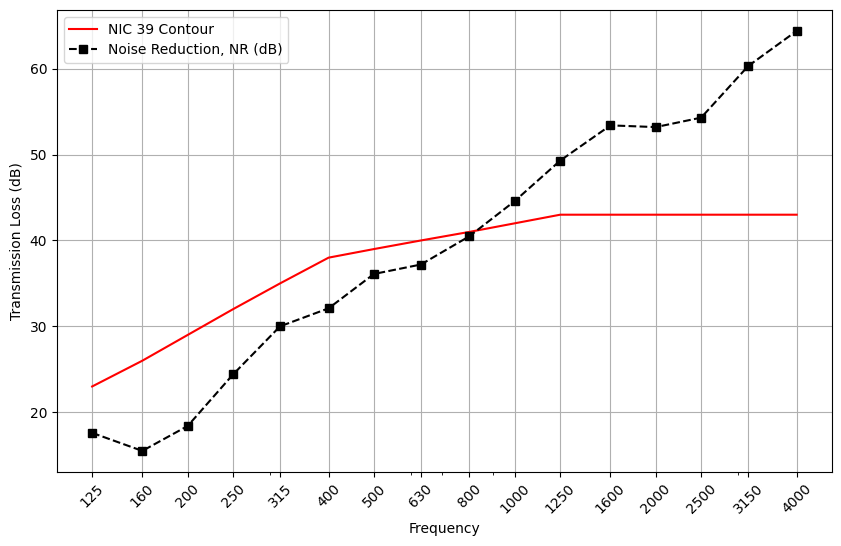

<Figure size 640x480 with 0 Axes>

In [30]:
## plot ASTC curves 

NIC_ref_label = 'Noise Reduction, NR (dB)'
ASTC_yAxis = 'Transmission Loss (dB)'
NICRef_label = f'NIC {NIC_final_val} Contour'
frequencies =[125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000]
NIC_plot_img = plot_curves(frequencies, ASTC_yAxis, NIC_contour_final,calc_NR,NICRef_label, NIC_ref_label)

In [8]:
single_test_dataframe = {
            'srs_data': pd.DataFrame(source_data),
            'recive_data': pd.DataFrame(recive_data),
            'bkgrnd_data': pd.DataFrame(bkgrnd_data),
            'rt': pd.DataFrame(rt),
            'AIIC_pos1': pd.DataFrame(AIIC_pos1),
            'AIIC_pos2': pd.DataFrame(AIIC_pos2),
            'AIIC_pos3': pd.DataFrame(AIIC_pos3),
            'AIIC_pos4': pd.DataFrame(AIIC_pos4),
            'AIIC_source': pd.DataFrame(AIIC_source),
            'AIIC_carpet': pd.DataFrame(AIIC_carpet),
            'room_properties': pd.DataFrame(room_properties)
        }
test_type = 'AIIC'
reportOutputfolder = '/Users/jakepfitsch/Documents/Documents - Jake’s iMac/Python_projects/STC_tester_reporter/Exampledata'

In [70]:
def create_report(curr_test, single_test_dataframe, reportOutputfolder,test_type):
    ## this function path included self for the GUI
    #### -=-=--=-= 
    ############ ####### # # # # # # INSERTING FUNCTION TO SWITCH REPORT FORMATS GIVEN THE TYPE OF TEST # # # # # # 
    # Document Setup 
    # document name and page size
    #  Example ouptut file name: '24-006 AIIC Test Report_1.1.1.pdf'
    #  format: project_name + test_type + test_num + '.pdf'
    # doc_name = f"{single_test_dataframe['room_properties']['Project_Name'][0]} {test_type} Test Report_{single_test_dataframe['room_properties']['Test_Label'][0]}.pdf"
    doc_name = f"{single_test_dataframe['room_properties']['Project Name']} {test_type} Test Report_{single_test_dataframe['room_properties']['Test number']}.pdf"
    
    
    doc = BaseDocTemplate(doc_name, pagesize=letter,
                        leftMargin=left_margin, rightMargin=right_margin,
                        topMargin=top_margin, bottomMargin=bottom_margin)

    # Define Frames for the header, main content, and footer
    header_frame = Frame(left_margin, letter[1] - top_margin - header_height, letter[0] - 2 * left_margin, header_height, id='header')
    main_frame = Frame(left_margin, bottom_margin + footer_height, letter[0] - 2 * left_margin, letter[1] - top_margin - header_height - footer_height - bottom_margin, id='main')
    footer_frame = Frame(left_margin, bottom_margin, letter[0] - 2 * left_margin, footer_height, id='footer')

    # Create styles
    styles = getSampleStyleSheet()
    custom_title_style = styles['Heading1']

    # Define header elements
    def header_elements():
        elements = []
        # if test_type == 'AIIC':
        elements.append(Paragraph("<b>Field Impact Sound Transmission Test Report</b>", custom_title_style))
        elements.append(Paragraph("<b>Apparent Impact Insulation Class (AIIC)</b>", custom_title_style))
        # elif test_type == 'ASTC':
        #     elements.append(Paragraph("<b>Field Sound Transmission Test Report</b>", custom_title_style))
        #     elements.append(Paragraph("<b>Apparent Sound Transmission Class (ASTC)</b>", custom_title_style))
        # elif test_type == 'NIC':
        #     elements.append(Paragraph("<b>Field Sound Transmission Test Report</b>", custom_title_style))
        #     elements.append(Paragraph("<b>Noise Isolation Class (NIC)</b>", custom_title_style))
        
        # elements.append(Paragraph("<b>Field Impact Sound Transmission Test Report</b>", custom_title_style))
        # elements.append(Paragraph("<b>Apparent Impact Insulation Class (AIIC)</b>", custom_title_style))
        elements.append(Spacer(1, 10))
        leftside_data = [
            ["Report Date:", single_test_dataframe['room_properties']['ReportDate'][0]],
            ['Test Date:', single_test_dataframe['room_properties']['Testdate'][0]],
            ['DLAA Test No', single_test_dataframe['room_properties']['Test number'][0]]
        ]
        rightside_data = [
            ["Source Room:", single_test_dataframe['room_properties']['Source Room Name'][0]],
            ["Receiver Room:", single_test_dataframe['room_properties']['Recieve Room Name'][0]],
            ["Test Assembly:", single_test_dataframe['room_properties']['Tested Assembly'][0]]
        ]

        table_left = Table(leftside_data)
        table_right = Table(rightside_data)
        table_left.setStyle(TableStyle([('GRID', (0, 0), (-1, -1), 1, colors.white)]))
        table_right.setStyle(TableStyle([('GRID', (0, 0), (-1, -1), 1, colors.white)]))

        table_combined_lr = Table([[table_left, table_right]], colWidths=[doc.width / 2.0] * 2)
        elements.append(KeepInFrame(maxWidth=doc.width, maxHeight=header_height, content=[table_combined_lr], hAlign='LEFT'))
        elements.append(Spacer(1, 10))
        elements.append(Paragraph('Test site: ' + single_test_dataframe['room_properties']['Site_Name'][0], styles['Normal']))
        elements.append(Spacer(1, 5))
        elements.append(Paragraph('Client: ' + single_test_dataframe['room_properties']['Client_Name'][0], styles['Normal']))
        return elements

    # Define a function to draw the header and footer
    def header_footer(canvas, doc):
        canvas.saveState()

        # Build the header
        header_frame._leftPadding = header_frame._rightPadding = 0
        header_story = header_elements()
        header_frame.addFromList(header_story, canvas)

        # Footer
        canvas.setFont('Helvetica', 10)
        footer_text = f"Page {doc.page}"
        canvas.drawCentredString(letter[0] / 2, bottom_margin + footer_height / 2, footer_text)

        canvas.restoreState()

    # Create a page template with header and footer
    page_template = PageTemplate(id='Standard', frames=[main_frame, header_frame, footer_frame], onPage=header_footer)
    doc.addPageTemplates([page_template])

    ######### Main document content ########
    def create_first_page(test_type, single_test_dataframe, styles):
        main_elements = []

        # Heading 'STANDARDS'
        styleHeading = ParagraphStyle('heading', parent=styles['Normal'], spaceAfter=10)
        main_elements.append(Spacer(1, 10))
        main_elements.append(Paragraph('<u>STANDARDS:</u>', styleHeading))

        # Standards table
        standards_data = [
            ['ASTM E1007-14', Paragraph('Standard Test Method for Field Measurement of Tapping Machine Impact Sound Transmission Through Floor-Ceiling Assemblies and Associated Support Structure', styles['Normal'])],
            ['ASTM E413-16', Paragraph('Standard Classification for Rating Sound Insulation', styles['Normal'])],
            ['ASTM E1007-14', Paragraph('Standard Test Method for Field Measurement of Tapping Machine Impact Sound Transmission Through Floor-Ceiling Assemblies and Associated Support Structure', styles['Normal'])],
            ['ASTM E989-06(2012)', Paragraph('Standard Classification for Determination of Impact Insulation Class (IIC)', styles['Normal'])],
            ['ASTM E2235-04(2012)', Paragraph('Standard Test Method for Determination of Decay Rates for Use in Sound Insulation Test Methods', styles['Normal'])]
        ]
        standards_table = Table(standards_data, hAlign='LEFT')
        standards_table.setStyle(TableStyle([
            ('INNERGRID', (0, 0), (-1, -1), 0.25, colors.white),
            ('BOX', (0, 0), (-1, -1), 0.25, colors.white),
            ('LEFTPADDING', (0, 0), (-1, -1), 6),
            ('RIGHTPADDING', (0, 0), (-1, -1), 6),
            ('TOPPADDING', (0, 0), (-1, -1), 6),
            ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
            ('VALIGN', (0, 0), (-1, -1), 'TOP'),
            ('ALIGN',(0,0), (-1,-1),'LEFT')
        ]))
        main_elements.append(standards_table)

        # Test Environment
        main_elements.append(Paragraph("<u>TEST ENVIRONMENT:</u>", styleHeading))
        main_elements.append(Paragraph(f"The source room was {single_test_dataframe['room_properties']['Source Room Name'][0]}. The space was{single_test_dataframe['room_properties']['Source room Finish'][0]}. The floor was {single_test_dataframe['room_properties']['Srs Floor Descrip.'][0]}. The ceiling was {single_test_dataframe['room_properties']['Srs Ceiling Descrip.'][0]}. The walls were{single_test_dataframe['room_properties']['Srs Walls Descrip.'][0]}. All doors and windows were closed during the testing period. The source room had a volume of approximately {single_test_dataframe['room_properties']['Source Vol'][0]}cu. ft."))
        main_elements.append(Spacer(1, 10))
        main_elements.append(Paragraph(f"The receiver room was {single_test_dataframe['room_properties']['Recieve Room Name'][0]}. The space was{single_test_dataframe['room_properties']['Recieve room Finish'][0]}. The floor was {single_test_dataframe['room_properties']['Rec Floor Descrip.'][0]}. The ceiling was {single_test_dataframe['room_properties']['Rec Ceiling Descrip.'][0]}. The walls were{single_test_dataframe['room_properties']['Rec Walls Descrip.'][0]}. All doors and windows were closed during the testing period. The source room had a volume of approximately {single_test_dataframe['room_properties']['Recieve Vol'][0]}cu. ft."))
        main_elements.append(Spacer(1, 10))
        main_elements.append(Paragraph(f"The test assembly measured approximately {single_test_dataframe['room_properties']['Partition dim.'][0]}, and had an area of approximately {single_test_dataframe['room_properties']['Partition area'][0]}sq. ft."))
        main_elements.append(Spacer(1, 10))

        # Test Assembly
        main_elements.append(Paragraph("<u>TEST ASSEMBLY:</u>", styleHeading))
        main_elements.append(Spacer(1, 10))
        main_elements.append(Paragraph(f"The tested assembly was the{single_test_dataframe['room_properties']['Tested Assembly'][0]}The assembly was not field verified, and was based on information provided by the client and drawings for the project. The client advised that no slab treatment or self-leveling was applied. Results may vary if slab treatment or self-leveling or any adhesive is used in other installations."))
        main_elements.append(PageBreak()) #################################  

        return main_elements
    
    def create_second_page(single_test_dataframe, standards_data, styleHeading):
        main_elements = []
        
        # Test Procedure
        main_elements.append(Paragraph("<u>TEST PROCEDURE:</u>", styleHeading))
        main_elements.append(Paragraph('Determination of space-average sound pressure levels was performed via the manually scanned microphones techique, described in ' + standards_data[0][0] + ', Paragraph 11.4.3.3.'+ "The source room was selected in accordance with ASTM E336-11 Paragraph 9.2.5, which states that 'If a corridor must be used as one of the spaces for measurement of ATL or FTL, it shall be used as the source space.'"))
        main_elements.append(Spacer(1,10))
        main_elements.append(Paragraph("Flanking transmission was not evaluated."))
        main_elements.append(Paragraph("To evaluate room absorption, 1 microphone was used to measure 4 decays at 4 locations around the receiving room for a total of 16 measurements, per"+standards_data[2][0]))
        
        # Test Instrumentation
        main_elements.append(Paragraph("<u>TEST INSTRUMENTATION:</u>", styleHeading))
        
        test_instrumentation_table = [
            ["Equipment Type","Manufacturer","Model Number","Serial Number",Paragraph("Last NIST Traceable Calibration"),Paragraph("Last Local Calibration")],
            ["Tapping Machine:","Norsonics","CAL200","2775671","9/19/2022","N/A"],
            ["Sound Level Meter","Larson Davis","831","4328","10/24/2022","4/4/2024"],
            ["Microphone Pre-Amp","Larson Davis","PRM831","046469","10/24/2022","4/4/2024"],
            ["Microphone","Larson Davis","377B20","168830","10/20/2022","4/4/2024"],
            ["Calibrator","Larson Davis","CAL200","5955","10/26/2022","N/A"],
            ["Amplified Loudspeaker","QSC","K10","GAA530909","N/A","N/A"],
            ["Noise Generator","NTi Audio","MR-PRO","0162","N/A","N/A"]
        ]
        
        test_instrumentation_table = Table(test_instrumentation_table, hAlign='LEFT')
        test_instrumentation_table.setStyle(TableStyle([
            ('INNERGRID', (0, 0), (-1, -1), 0.25, colors.white),
            ('BOX', (0, 0), (-1, -1), 0.25, colors.white),
            ('LEFTPADDING', (0, 0), (-1, -1), 6),
            ('RIGHTPADDING', (0, 0), (-1, -1), 6),
            ('TOPPADDING', (0, 0), (-1, -1), 6),
            ('BOTTOMPADDING', (0, 0), (-1, -1), 6),
            ('VALIGN', (0, 0), (-1, -1), 'TOP'),
            ('ALIGN',(0,0), (-1,-1),'LEFT')
        ]))
        
        main_elements.append(test_instrumentation_table)
        main_elements.append(PageBreak())
        
        return main_elements
    
    # Add the second page elements to main_elements
    main_elements.extend(create_second_page(single_test_dataframe, standards_data, styleHeading))
    ####### 3rd page - ASTC/NIC reference contour plot
    def create_third_page_plot(test_type, AIIC_contour_val, AIIC_contour_final, Nrec_ANISPL, styles):
        main_elements = []
        
        frequencies = [125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000]
        
        if test_type == 'AIIC':
            y_axis = 'Sound Pressure Level (dB)'
            ref_label = f'AIIC {AIIC_contour_val} Contour'
            field_label = 'Absorption Normalized Impact Sound Pressure Level, ANISPL (dB)'
            
            plot_fig = plot_curves(frequencies, y_axis, AIIC_contour_final, Nrec_ANISPL, ref_label, field_label)
            
            main_elements.append('plot fig here!')
            main_elements.append(Spacer(1, 10))
            
            contour_text = f'AIIC {AIIC_contour_val}'
            contour_box = Paragraph(contour_text, styles['Normal'])
            main_elements.append(contour_box)
        
        # Add similar conditions for other test types (ASTC, NIC) if needed
        
        return main_elements

    # main_elements.extend(create_third_page_plot(test_type, AIIC_contour_val, AIIC_contour_final, Nrec_ANISPL, styles))

    def create_full_report(curr_test, single_test_dataframe, reportOutputfolder, test_type):
        # Document setup
        doc_name = f"{single_test_dataframe['room_properties']['Project_Name'][0]} {test_type} Test Report_{single_test_dataframe['room_properties']['Test_Label'][0]}.pdf"
        doc = BaseDocTemplate(f"{reportOutputfolder}/{doc_name}", pagesize=letter,
                              leftMargin=left_margin, rightMargin=right_margin,
                              topMargin=top_margin, bottomMargin=bottom_margin)

        # Define frames
        header_frame = Frame(left_margin, letter[1] - top_margin - header_height, 
                             letter[0] - 2 * left_margin, header_height, id='header')
        main_frame = Frame(left_margin, bottom_margin + footer_height, 
                           letter[0] - 2 * left_margin, 
                           letter[1] - top_margin - header_height - footer_height - bottom_margin, 
                           id='main')
        footer_frame = Frame(left_margin, bottom_margin, 
                             letter[0] - 2 * left_margin, footer_height, id='footer')

        # Create styles
        styles = getSampleStyleSheet()
        custom_title_style = styles['Heading1']
        styleHeading = ParagraphStyle('heading', parent=styles['Normal'], spaceAfter=10)

        # Create page template
        def header_footer(canvas, doc):
            canvas.saveState()
            header_elements = header_elements_func(single_test_dataframe, test_type, doc, custom_title_style)
            header_frame.addFromList(header_elements, canvas)
            canvas.setFont('Helvetica', 10)
            footer_text = f"Page {doc.page}"
            canvas.drawCentredString(letter[0] / 2, bottom_margin + footer_height / 2, footer_text)
            canvas.restoreState()

        page_template = PageTemplate(id='Standard', frames=[main_frame], onPage=header_footer)
        doc.addPageTemplates([page_template])

        # Generate content
        main_elements = []
        main_elements.extend(create_first_page(test_type, single_test_dataframe, styleHeading))
        main_elements.extend(create_second_page(single_test_dataframe, standards_data, styleHeading))
        main_elements.extend(create_third_page_plot(test_type, AIIC_contour_val, AIIC_contour_final, Nrec_ANISPL, styles))

        # Build and save document
        doc.build(main_elements)
        print(f"Report saved as: {doc_name}")

    # Call the function to create the full report
    create_full_report(curr_test, single_test_dataframe, reportOutputfolder, test_type)
    # Output a file string for the PDF made up of test number and test type
    output_file = f"{reportOutputfolder}/Report_{curr_test['Test_Label']}_{test_type}.pdf"
    print(f"Saving report to: {output_file}")
    # Build the document
    # print('final elements: ', main_elements)
    doc.build(main_elements)

    # Save the document as a PDF
    doc.save(output_file)


In [ ]:
class BaseTestReport:
    def __init__(self, curr_test, single_test_dataframe, reportOutputfolder):
        self.curr_test = curr_test
        self.single_test_dataframe = single_test_dataframe
        self.reportOutputfolder = reportOutputfolder

    def get_doc_name(self):
        raise NotImplementedError

    def get_standards_data(self):
        raise NotImplementedError

    def get_test_procedure(self):
        raise NotImplementedError

    def get_test_instrumentation(self):
        raise NotImplementedError

    def create_results_table(self):
        raise NotImplementedError

    def create_plot(self):
        raise NotImplementedError

    def get_report_title(self):
        raise NotImplementedError

end of first page text, elements so far:  [Spacer(1, 10), Paragraph(
'caseSensitive': 1
'encoding': 'utf8'
'text': '<u>STANDARDS:</u>'
'frags': [ParaFrag(__tag__='u', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='STANDARDS:', textColor=Color(0,0,0,1), us_lines=[(0, 'underline', None, '', '-0.125*F', 0, 1, '1')])]
'style': <ParagraphStyle 'heading'>
'bulletText': None
'debug': 0
) #Paragraph, Table(
 rowHeights=[None, None, None, None, None],
 colWidths=[None, None],
[['ASTM E1007-14',
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Standard Test Method for Field Measurement of Tapping Machine Impact Sound Transmission Through Floor-Ceiling Assemblies and Associated Support Structure'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Standard Test Method for Field Measurement of Tapping Machine Impact Sound Transmission Through Floor-Ceiling Assemblies and A

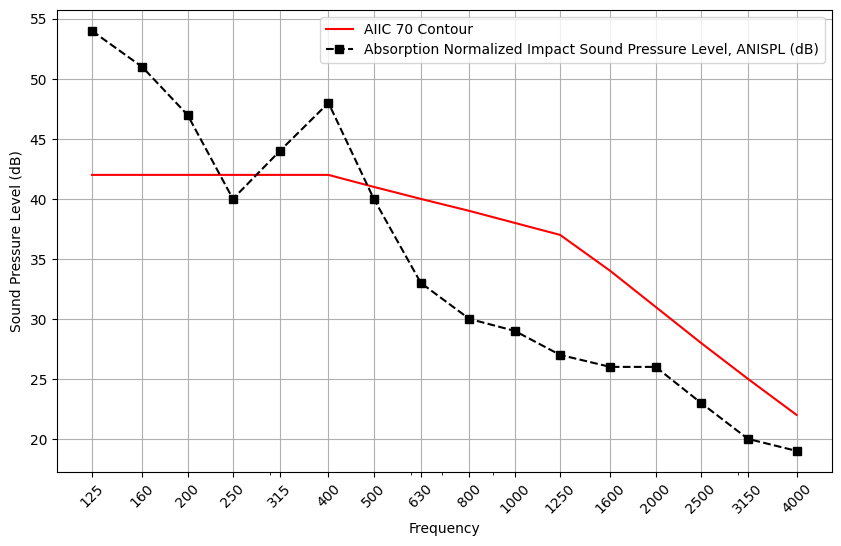

Saving report to: C:\Users\jPfitsch\OneDrive - D.L. Adams Associates\Documents\Python_code_lib\/Report_1.1.1_AIIC.pdf
final elements:  [Spacer(1, 10), Paragraph(
'caseSensitive': 1
'encoding': 'utf8'
'text': '<u>STANDARDS:</u>'
'frags': [ParaFrag(__tag__='u', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='STANDARDS:', textColor=Color(0,0,0,1), us_lines=[(0, 'underline', None, '', '-0.125*F', 0, 1, '1')])]
'style': <ParagraphStyle 'heading'>
'bulletText': None
'debug': 0
) #Paragraph, Table(
 rowHeights=[None, None, None, None, None],
 colWidths=[None, None],
[['ASTM E1007-14',
    Paragraph(
  'caseSensitive': 1
  'encoding': 'utf8'
  'text': 'Standard Test Method for Field Measurement of Tapping Machine Impact Sound Transmission Through Floor-Ceiling Assemblies and Associated Support Structure'
  'frags': [ParaFrag(__tag__='para', bold=0, fontName='Helvetica', fontSize=10, greek=0, italic=0, link=[], rise=0, text='Standard Test Method for Field Me

AttributeError: 'int' object has no attribute 'wrapOn'

<Figure size 640x480 with 0 Axes>

In [71]:
create_report(curr_test, single_test_dataframe, reportOutputfolder,test_type)

In [2]:
AIIC_Exceptions = list()
rec_roomvol = single_test_dataframe['room_properties']['Recieve Vol'][0]
for vals in sabines:
    if vals > 2*(rec_roomvol**2/3):
        AIIC_Exceptions.append('0')
    else:
        AIIC_Exceptions.append('1')

NameError: name 'single_test_dataframe' is not defined

In [56]:
print(len(AIIC_Exceptions[1:17]))
print(len(Nrec_ANISPL))
print(len(frequencies))
print(len(onethird_bkgrd))
print(len(rt_thirty))
print(len(sabines))


16
18
16
18
18
18


In [1]:
print(AIIC_Exceptions[1:17])

NameError: name 'AIIC_Exceptions' is not defined

In [ ]:
### PROTO CALC FUNCTION FOR AIIC ######
##### REMOVING THIS CALC SECTION FOR REPORT TROUBLESHOOTING #####
onethird_srs = format_SLMdata(single_test_dataframe['AIIC_source']) 
average_pos = []
# get average of 4 tapper positions for recieve total OBA
for i in range(1, 5):
    pos_input = f'AIIC_pos{i}'
    pos_data = format_SLMdata(single_test_dataframe[pos_input])
    average_pos.append(pos_data)

onethird_rec_Total = sum(average_pos) / len(average_pos)
# this needs to be an average of the 4 tapper positions, stored in a dataframe of the average of the 4 dataframes octave band results. 
onethird_bkgrd = format_SLMdata(single_test_dataframe['bkgrnd_data'])
rt_thirty = single_test_dataframe['rt']['Unnamed: 10'][25:41]/1000

calc_NR, sabines, corrected_recieve,Nrec_ANISPL = calc_NR_new(onethird_srs, onethird_rec_Total, onethird_bkgrd, rt_thirty,single_test_dataframe['room_properties']['receive_room_vol'][0],NIC_vollimit=883,testtype='AIIC')

# ATL_val = calc_ATL_val(onethird_srs, onethird_rec, onethird_bkgrd,rt_thirty,room_properties['Partition area'][0],room_properties['Recieve Vol'][0])
AIIC_contour_val, IIC_curve = calc_AIIC_val_claude(Nrec_ANISPL, verbose=True)

IIC_curve = [2,2,2,2,2,2,1,0,-1,-2,-3,-6,-9,-12,-15,-18]
IIC_contour_final = list()
# initial application of the IIC curve to the first AIIC start value 
for vals in IIC_curve:
    IIC_contour_final.append(vals+(110-AIIC_contour_val))
# print(IIC_contour_final)
####### END OF REMOVING THIS SECTION FOR REPORT TROUBLESHOOTING #######

In [39]:
#### PROTO CALC FUNCTION FOR ASTC #####

####### REMOVING THIS CALC SECTION FOR REPORT TROUBLESHOOTING ######
# obtain SLM data from overall dataframe 
onethird_rec = format_SLMdata(single_test_dataframe['recive_data'])
onethird_srs = format_SLMdata(single_test_dataframe['srs_data'])
onethird_bkgrd = format_SLMdata(single_test_dataframe['bkgrnd_data'])

rt_thirty = single_test_dataframe['rt']['Unnamed: 10'][25:41]/1000
# Calculation of ATL
ATL_val,corrected_STC_recieve = calc_ATL_val(onethird_srs, onethird_rec, onethird_bkgrd,single_test_dataframe['room_properties']['partition_area'][0],single_test_dataframe['room_properties']['receive_room_vol'][0],sabines)
# Calculation of NR
calc_NR, sabines, corrected_recieve,Nrec_ANISPL = calc_NR_new(onethird_srs, onethird_rec, onethird_bkgrd, rt_thirty,single_test_dataframe['room_properties']['receive_room_vol'][0],NIC_vollimit=883,testtype='ASTC')
# creating reference curve for ASTC graph
STCCurve = [-16, -13, -10, -7, -4, -1, 0, 1, 2, 3, 4, 4, 4, 4, 4, 4]
ASTC_contour_final = list()
for vals in STCCurve:
    ASTC_contour_final.append(vals+(ATL_val))


In [ ]:
### PROTO ASTC SECTION FOR SPECIFIC FUNCTION

### PAGE 1 ###
standards_data = [
    ['ASTM E336-16', Paragraph('Standard Test Method for Measurement of Airborne Sound Attenuation between Rooms in Buildings',styles['Normal'])],
    ['ASTM E413-16', Paragraph('Classification for Rating Sound Insulation',styles['Normal'])],
    ['ASTM E2235-04(2012)', Paragraph('Standard Test Method for Determination of Decay Rates for Use in Sound Insulation Test Methods',styles['Normal'])]
]
## PAGE 2 ## 
test_instrumentation_table = [
    ["Equipment Type","Manufacturer","Model Number","Serial Number",Paragraph("Last NIST Traceable Calibration"),Paragraph("Last Local Calibration")],
    ["Sound Level Meter 1", "Larson Davis","831","4328","10/24/2022","Apr 2024"],
    ["Microphone Pre-Amp:","Larson Davis","PRM831","046469","10/24/2022","Apr 2024"],
    ["Microphone:","Larson Davis","377B20","168830","10/20/2022","Apr 2024"],
    ["Calibrator:","Larson Davis","CAL200","5955","10/26/2022","N/A"],
    ["Sound Level Meter 2","Larson Davis","831","4328","10/24/2022","Apr 2024",],
    ["Microphone Pre-Amp:","Larson Davis","PRM831","046469","10/24/2022","Apr 2024"],
    ["Microphone:","Larson Davis","377B20","168830","10/20/2022","Apr 2024"],
    ["Calibrator:","Larson Davis","CAL200","5955","10/26/2022","N/A"],
    ["Amplified Loudspeaker","QSC","K10","GAA530909","N/A","N/A"]
]


main_elements.append(Paragraph("The Apparent Sound Transmission Class (ASTC) was calculated. The ASTC rating is based on Apparent Transmission Loss (ATL), and includes the effects of noise flanking. The ASTC reference contour is shown on the next page, and has been “fit” to the Apparent Transmission Loss values, in accordance with the procedure of "+standards_data[0][0]))
## PAGE 3 ##
ASTC_Absorption_Exceptions = list()
ASTC_Background_Exceptions = list()
rec_roomvol = single_test_dataframe['room_properties']['receive_room_vol'][0]
for vals in sabines:
    if vals > 2*(rec_roomvol**2/3):
        ASTC_Absorption_Exceptions.append('0')
    else:
        ASTC_Absorption_Exceptions.append('1')
for vals in onethird_bkgrd:
    if onethird_rec - vals < 5:
        ASTC_Background_Exceptions.append('0')
    else:
        ASTC_Background_Exceptions.append('1')    
Test_result_table = pd.DataFrame(
    {
        "Frequency": frequencies,
        "L1, Average Source Room Level (dB)": onethird_srs,
        "L2, Average Corrected Receiver Room Level (dB)":ASTC_corrected_recieve,
        "Average Receiver Background Level (dB)": onethird_bkgrd,
        "Average RT60 (Seconds)": rt_thirty,
        "Noise Reduction, NR (dB)": calc_NR,
        "Apparent Transmission Loss, ATL (dB)": ATL_val,
        "Absorption Exceptions": ASTC_Absorption_Exceptions,
        "Background Noise Exceptions": ASTC_Background_Exceptions
    }
)

### PAGE 3
ASTC_ref_label = f'ASTC {ASTC_final_val} Contour'
ASTC_yAxis = 'Transmission Loss (dB)'
frequencies =[125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000]
ASTC_plot_img = plot_curves(frequencies, ASTC_yAxis, ASTC_contour_final,Nrec_ANISPL,ASTC_ref_label)
plot_img = Image(ASTC_plot_img, 6*inch, 4*inch)
main_elements.append(plot_img)

In [ ]:
frequencies = [100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150]

In [ ]:
### NIC PROTO SECTION

# also ASTC standards taqble 
standards_data = [
    ['ASTM E336-16', Paragraph('Standard Test Method for Measurement of Airborne Sound Attenuation between Rooms in Buildings',styles['Normal'])],
    ['ASTM E413-16', Paragraph('Classification for Rating Sound Insulation',styles['Normal'])],
    ['ASTM E2235-04(2012)', Paragraph('Standard Test Method for Determination of Decay Rates for Use in Sound Insulation Test Methods',styles['Normal'])]
]
## PAGE 2 ##
main_elements.append(Paragraph("The Noise Isolation Class (NIC) was calculated. The NIC rating is based on Noise Reduction (NR), and includes the effects of noise flanking. The NIC reference contour is shown on the next page, and has been “fit” to the Apparent Transmission Loss values, in accordance with the procedure of "+standards_data[0][0]))

print('NIC table :' Test_result_table) 
Test_result_table = pd.DataFrame(
    {
        "Frequency": frequencies,
        "L1, Average Source Room Level (dB)": onethird_srs,
        "L2, Average Corrected Receiver Room Level (dB)":ASTC_corrected_recieve,
        "Average Receiver Background Level (dB)": onethird_bkgrd,
        "Noise Reduction, NR (dB)": calc_NR,
    }
)

### PAGE 3
NIC_ref_label = 'Noise Reduction, NR (dB)'
ASTC_yAxis = 'Transmission Loss (dB)'
NICRef_label = f'NIC {NIC_final_val} Contour'
frequencies =[125,160,200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000]
NIC_plot_img = plot_curves(frequencies, ASTC_yAxis, NIC_contour_final,calc_NR,NICRef_label, NIC_ref_label)
plot_img = Image(NIC_plot_img, 6*inch, 4*inch)
main_elements.append(plot_img)